In [76]:
import pandas as pd

df = pd.read_csv('escooter_data.csv')
df = df.dropna(subset=['Start Centroid Longitude', 'End Centroid Longitude'])
df.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
10291,0dd95046-1bc8-4464-ba39-7f9e92c668b3,08/06/2019 06:00:00 PM,08/06/2019 06:00:00 PM,1004,236,152,1.703120e+10,1.703120e+10,20.0,20.0,HERMOSA,HERMOSA,41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613)
10293,6819df6a-9623-4ae0-b1d3-ec617197d229,07/08/2019 04:00:00 PM,07/08/2019 05:00:00 PM,9124,3182,10,1.703115e+10,1.703119e+10,15.0,19.0,PORTAGE PARK,BELMONT CRAGIN,41.949592,-87.761958,POINT (-87.7619580301513 41.9495915671753),41.920143,-87.760827,POINT (-87.7608269556143 41.920143229102)
10342,aa71bb53-3e7f-4964-b6e6-030800419346,08/10/2019 09:00:00 PM,08/10/2019 09:00:00 PM,502,97,152,1.703184e+10,1.703184e+10,27.0,27.0,EAST GARFIELD PARK,EAST GARFIELD PARK,41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253),41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253)
10367,5d256770-1a8a-5e20-8f78-316d1819f46b,06/25/2019 07:00:00 PM,06/25/2019 08:00:00 PM,5053,2167,0,1.703122e+10,1.703119e+10,22.0,19.0,LOGAN SQUARE,BELMONT CRAGIN,41.921126,-87.699754,POINT (-87.6997540616386 41.9211256768265),41.927819,-87.751362,POINT (-87.7513623675995 41.9278186319205)
10369,dffe5324-5f6f-48e7-9edf-d51876ba7d2f,09/19/2019 08:00:00 AM,09/19/2019 08:00:00 AM,790,111,152,1.703119e+10,1.703120e+10,19.0,20.0,BELMONT CRAGIN,HERMOSA,41.935218,-87.744389,POINT (-87.7443888733072 41.9352176386575),41.927852,-87.735628,POINT (-87.7356282729632 41.9278522690551)


In [77]:
from tqdm.notebook import tqdm

df['Start Time'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
df['End Time'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %I:%M:%S %p')
df.sort_values(by='Start Time', inplace=True)

# Dictionary to map end locations of previous trips to e-scooter IDs
end_location_to_escooter_id = {}

# Dictionary to store cumulative distance for each e-scooter ID and date
cumulative_distance = {}

# Process each day separately
for date, group in tqdm(df.groupby(df['Start Time'].dt.date), desc="Processing Days"):
    e_id = 1  # Reset e-scooter ID for each day
    end_location_to_escooter_id.clear()

    for index, row in group.iterrows():
        start_location = row['Start Centroid Location']
        end_location = row['End Centroid Location']
        trip_distance = row['Trip Distance']

        # Check if the trip starts where a previous trip ended
        if start_location in end_location_to_escooter_id:
            scooter_id = end_location_to_escooter_id[start_location]
        else:
            scooter_id = e_id
            cumulative_distance[(scooter_id, date)] = 0  # Initialize cumulative distance for new e-scooter
            e_id += 1

        # Add the current cumulative distance to the dataframe
        df.loc[index, 'Cumulative Distance at Start'] = cumulative_distance[(scooter_id, date)]

        # Update the cumulative distance and end location for this e-scooter
        cumulative_distance[(scooter_id, date)] += trip_distance
        end_location_to_escooter_id[end_location] = scooter_id
        
df

Processing Days:   0%|          | 0/111 [00:00<?, ?it/s]

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,Cumulative Distance at Start
148345,0b6cc3f2-0a61-43a5-928f-0de692aa8a2b,2019-06-15 04:00:00,2019-06-15 05:00:00,688,3921,152,NaN,NaN,31.0,31.0,LOWER WEST SIDE,LOWER WEST SIDE,41.850266,-87.667568,POINT (-87.6675682255936 41.8502661710639),41.850266,-87.667568,POINT (-87.6675682255936 41.8502661710639),0.0
241809,4793f3c4-77ed-416b-b72a-2e9bfbcd311c,2019-06-15 06:00:00,2019-06-15 06:00:00,0,5,10,NaN,NaN,28.0,28.0,NEAR WEST SIDE,NEAR WEST SIDE,41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),0.0
223923,297b2b72-f371-45b1-8ac0-821a9b0d6ad3,2019-06-15 06:00:00,2019-06-15 06:00:00,2078,383,152,1.703183e+10,1.703183e+10,28.0,28.0,NEAR WEST SIDE,NEAR WEST SIDE,41.879077,-87.657045,POINT (-87.65704538762 41.8790767308624),41.879077,-87.657045,POINT (-87.65704538762 41.8790767308624),0.0
126554,e081485f-81c2-5780-beda-cc05217dcd2c,2019-06-15 06:00:00,2019-06-15 06:00:00,4473,1831,0,NaN,NaN,22.0,22.0,LOGAN SQUARE,LOGAN SQUARE,41.922760,-87.699156,POINT (-87.6991559457654 41.9227598585219),41.922760,-87.699156,POINT (-87.6991559457654 41.9227598585219),0.0
324537,d5ec7eaf-4b5b-467c-bfc1-b6b918eef1a0,2019-06-15 06:00:00,2019-06-15 06:00:00,1073,299,152,1.703183e+10,1.703183e+10,28.0,28.0,NEAR WEST SIDE,NEAR WEST SIDE,41.879077,-87.657045,POINT (-87.65704538762 41.8790767308624),41.879077,-87.657045,POINT (-87.65704538762 41.8790767308624),2078.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301191,977edd2a-a5e3-52da-640a-15f05c2d382f,2019-10-16 00:00:00,2019-10-16 00:00:00,3846,694,10,NaN,NaN,28.0,28.0,NEAR WEST SIDE,NEAR WEST SIDE,41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),1874.0
305215,b65717f2-4c66-e992-ebf2-66e6de0c4144,2019-10-16 00:00:00,2019-10-16 00:00:00,1874,372,10,NaN,NaN,28.0,28.0,NEAR WEST SIDE,NEAR WEST SIDE,41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),5720.0
290196,b8592dce-7847-1709-734f-a7cf93d5633f,2019-10-16 00:00:00,2019-10-16 00:00:00,363,86,10,NaN,NaN,28.0,28.0,NEAR WEST SIDE,NEAR WEST SIDE,41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),7594.0
404153,08cc0735-2a60-1e07-256c-1b80c84b481a,2019-10-16 00:00:00,2019-10-16 00:00:00,1144,392,10,NaN,NaN,28.0,24.0,NEAR WEST SIDE,WEST TOWN,41.874005,-87.663518,POINT (-87.6635178867003 41.8740053848845),41.901207,-87.676357,POINT (-87.6763571260391 41.9012067343156),7957.0


In [78]:
top_10_percent_start = df['Cumulative Distance at Start'].quantile(0.9)
top_10_percent_start

3414405.999999999

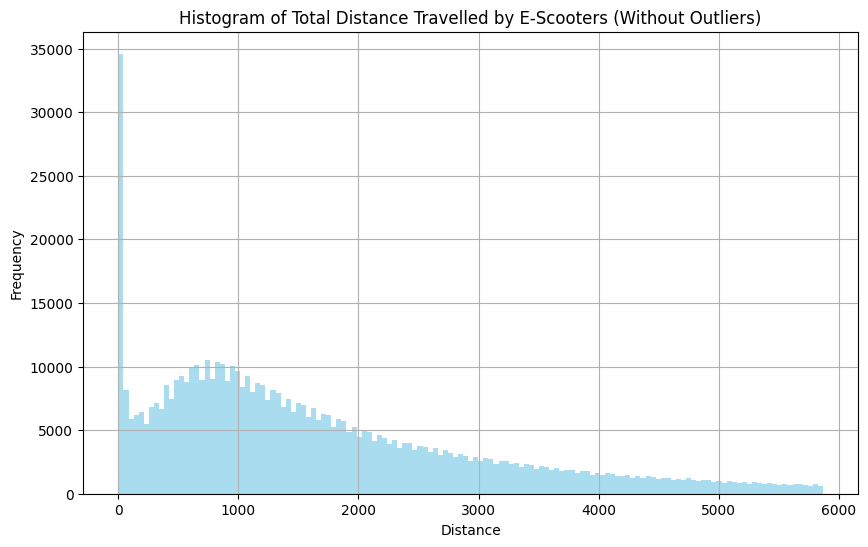

In [53]:
import matplotlib.pyplot as plt

Q1 = df['Trip Distance'].quantile(0.25)
Q3 = df['Trip Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_distances = df['Trip Distance'][(df['Trip Distance'] >= lower_bound) & (df['Trip Distance'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_distances, bins='auto', color='skyblue', alpha=0.7)
plt.title('Histogram of Total Distance Travelled by E-Scooters (Without Outliers)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.35 sec] [RSS: 2.48866e-06] [loc=1667.315 scale=1356.003]
[distfit] >INFO> [expon     ] [0.22 sec] [RSS: 1.37551e-06] [loc=0.000 scale=1667.315]
[distfit] >INFO> [pareto    ] [32.7 sec] [RSS: 1.37551e-06] [loc=-137438953472.000 scale=137438953472.000]
[distfit] >INFO> [dweibull  ] [154. sec] [RSS: 2.30108e-06] [loc=1504.513 scale=1128.434]
[distfit] >INFO> [t         ] [1171 sec] [RSS: 2.48853e-06] [loc=1667.223 scale=1355.920]
[distfit] >INFO> [genextreme] [1363 sec] [RSS: 6.31155e-06] [loc=2.957 scale=16.989]
[distfit] >INFO> [gamma     ] [330. sec] [RSS: 1.86864e-06] [loc=-0.000 scale=1997.833]
[distfit] >INFO> [lognorm   ] [500. sec] [RSS: 7.14764e-06] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [449. sec] [RSS: 1.1665e-06] [loc=-0.000 scale=8886.578]
[distfit] >INFO> [uniform   ] [0.15 sec] [RSS: 3.68574e-06] [loc=0.000 scale=5869.000]
[distfit] >INFO> [loggamma  ] [328. sec] [RSS: 2.46615e-

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=0.934174, b=4.18094, loc=-4.30681e-28, scale=8886.58)'}, xlabel='Values', ylabel='Frequency'>)

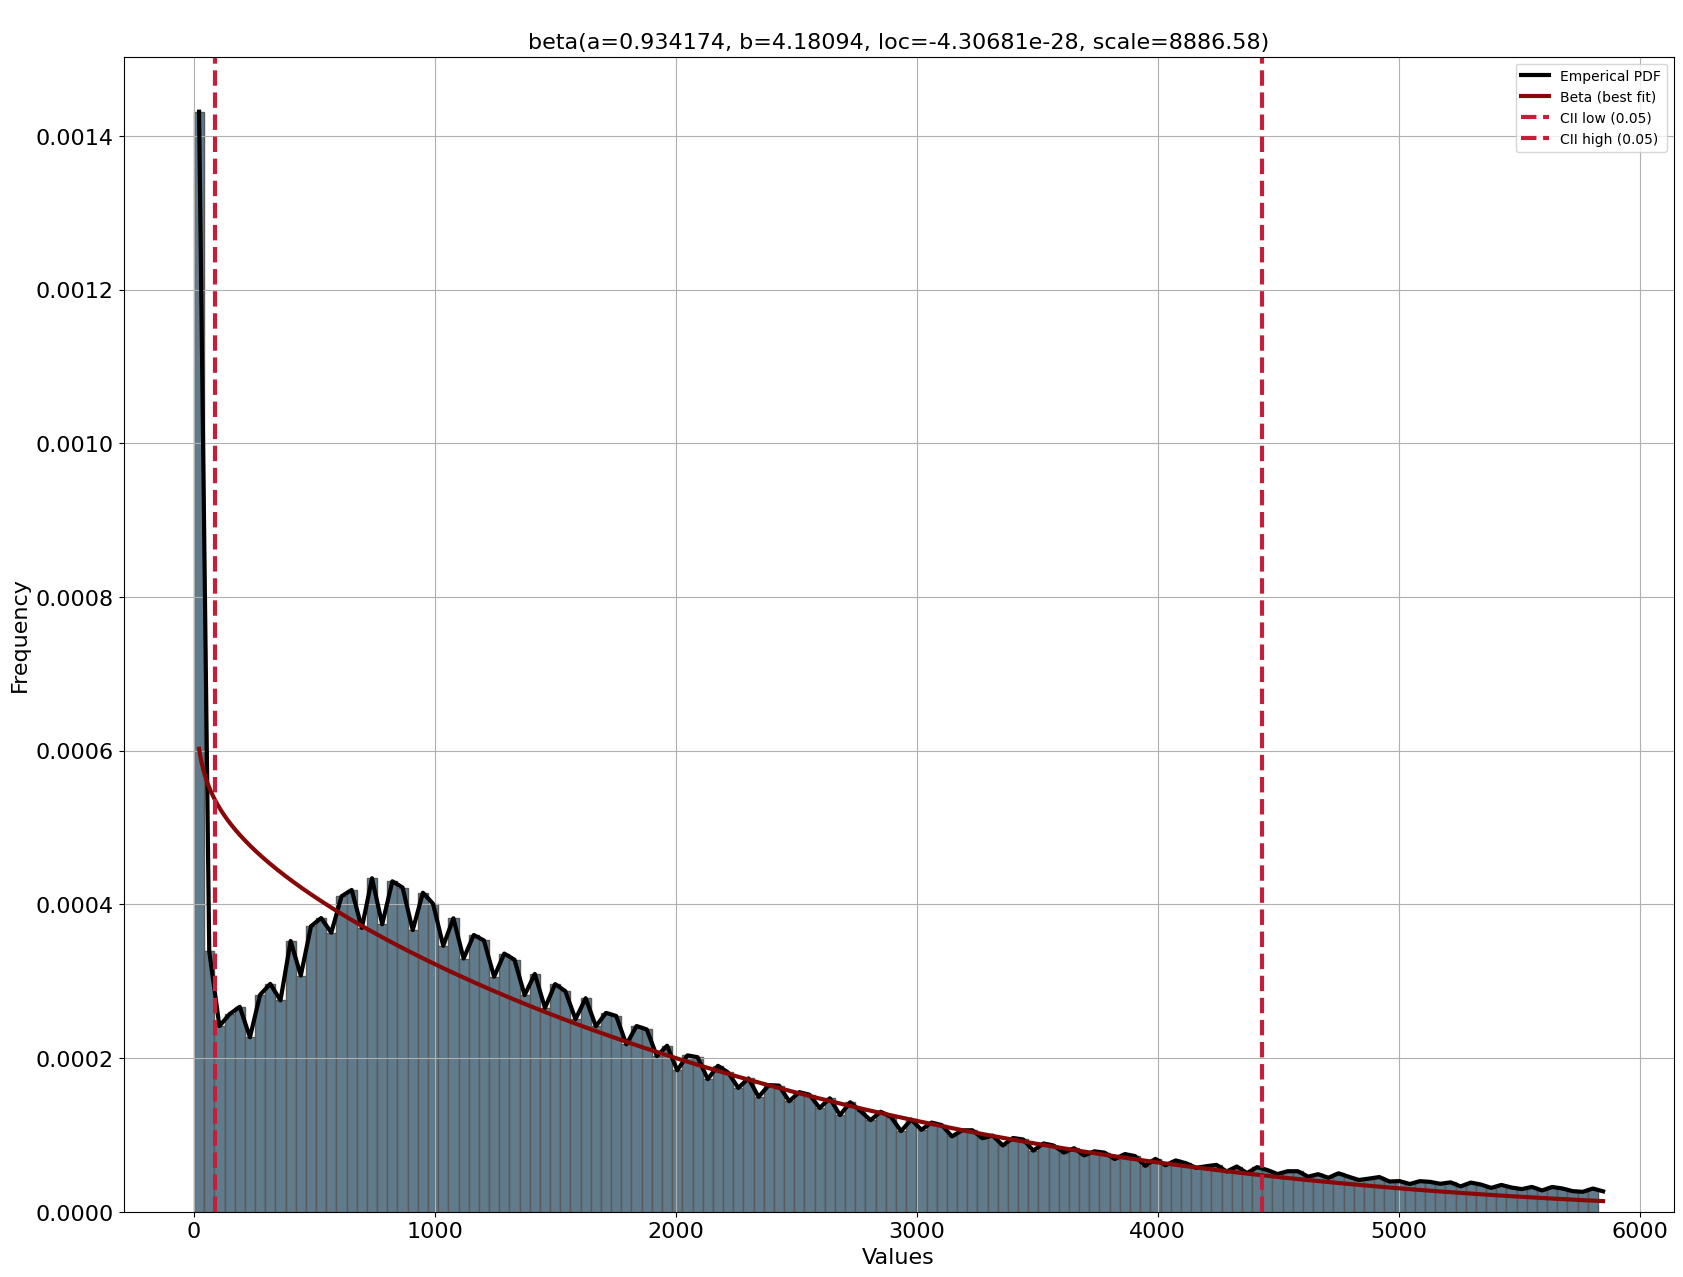

In [67]:
from distfit import distfit


dfit = distfit()
dfit.fit_transform(filtered_distances)
dfit.plot()

Best fitting distribution: norm
Best fit parameters: (1667.31546834868, 1356.002980111313)
Kolmogorov-Smirnov statistic: 0.10942702869534732, p-value: 0.0


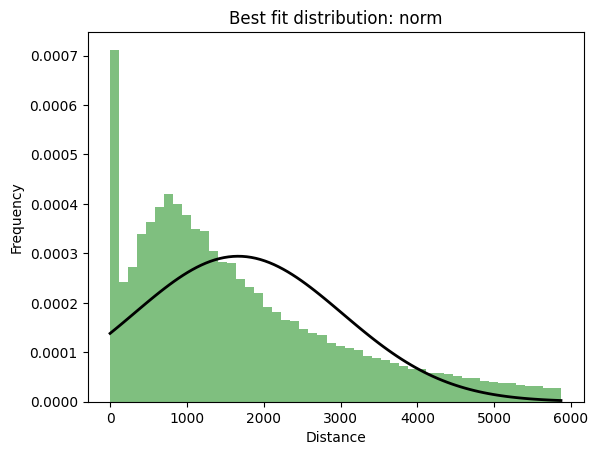

In [66]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'filtered_distances' is a NumPy array or a list of your data.

# Define a list of distributions to test
# We will just test a few common distributions here.
distributions = [stats.norm, stats.lognorm, stats.expon, stats.gamma]

# Fit our data to each distribution and store the results
results = []
for distribution in distributions:
    # Fit the distribution to the data
    params = distribution.fit(filtered_distances)
    
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    # Calculate the Kolmogorov-Smirnov test for the distribution
    D, p = stats.kstest(filtered_distances, distribution.name, args=(loc, scale) + arg)
    
    # Store the results
    results.append((distribution.name, params, D, p))

# Sort by the p-value in descending order
results.sort(key=lambda x: x[3], reverse=True)

# Print the results of the best fitting distribution
best_fit_name, best_fit_params, best_fit_stat, best_fit_p = results[0]
print(f"Best fitting distribution: {best_fit_name}")
print(f"Best fit parameters: {best_fit_params}")
print(f"Kolmogorov-Smirnov statistic: {best_fit_stat}, p-value: {best_fit_p}")

# Plot the histogram and the PDF of the best fitting distribution
plt.hist(filtered_distances, bins=50, density=True, alpha=0.5, color='g')

# Add the best fit distribution to the histogram
rv = getattr(stats, best_fit_name)
plt.plot(np.linspace(min(filtered_distances), max(filtered_distances), 100),
         rv.pdf(np.linspace(min(filtered_distances), max(filtered_distances), 100),
         *best_fit_params[:-2], loc=best_fit_params[-2], scale=best_fit_params[-1]),
         'k-', lw=2)

plt.title(f'Best fit distribution: {best_fit_name}')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


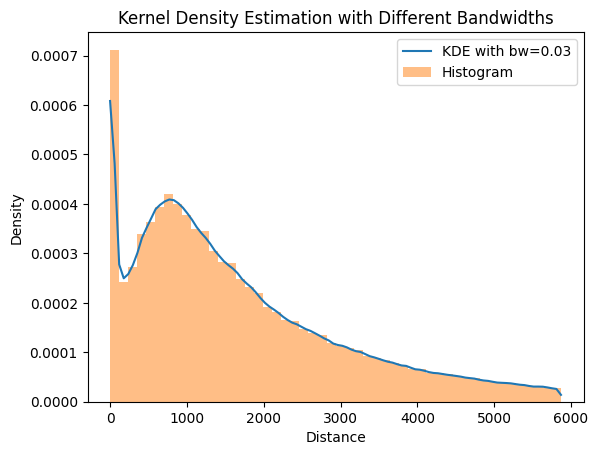

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

bw_values = [0.03]
for bw in bw_values:
    kde = gaussian_kde(filtered_distances, bw_method=bw)
    dist_space = np.linspace(min(filtered_distances), max(filtered_distances), 100)
    plt.plot(dist_space, kde(dist_space), label=f'KDE with bw={bw}')

plt.hist(filtered_distances, bins=50, density=True, alpha=0.5, label='Histogram')
plt.title('Kernel Density Estimation with Different Bandwidths')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.legend()
plt.show()


In [75]:
import pickle
kde_data = {
    'dataset': kde.dataset,
    'bandwidth': kde.factor
}

with open('distributions/trip_distance.pkl', 'wb') as file:
    pickle.dump(kde_data, file)